# Дипломная работа по python

Дан файл HR.csv с данными по опросу уровня удовлетворенности сотрудниками работой.

Признаки:

1. satisfaction_level - Уровень удовлетворенности работой
2. Last_evaluation - Время с момента последней оценки в годах
3. number_projects - Количество проектов, выполненных за время работы
4. average_monthly_hours - Среднее количество часов на рабочем месте в месяц
5. time_spend_company - Стаж работы в компании в годах
6. work_accident - Происходили ли несчастные случаи на рабочем месте с сотрудником
7. left - уволился ли сотрудник
8. promotion_last_5years - повышался ли сотрудник за последние пять лет
9. department - отдел в котором работает сотрудник
10. salary - относительный уровень зарплаты

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats 

### 1. Загрузите файл HR.csv в pandas dataframe

In [3]:
df = pd.read_csv('HR.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### 2. Рассчитайте основные статистики для переменных
(среднее,медиана,мода,мин/макс,сред.отклонение).

In [4]:
basic_stats = df.describe()
basic_stats

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [5]:
basic_stats.loc['mode'] = [df[i].mode()[0] for i in basic_stats.columns]
basic_stats

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000
mode,0.100000,0.550000,4.000000,135.000000,3.000000,0.000000,0.000000,0.000000


### 3. Рассчитайте и визуализировать корреляционную матрицу для количественных переменных. Определите две самые скоррелированные и две наименее скоррелированные переменные.

In [6]:
# оставляем только количественные переменные (первые 5), 
# категориальные убираем - Work_accident, left, promotion_last_5years, department и salary
correlation_matrix = df.iloc[:,[0,1,2,3,4]].corr()
correlation_matrix

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000


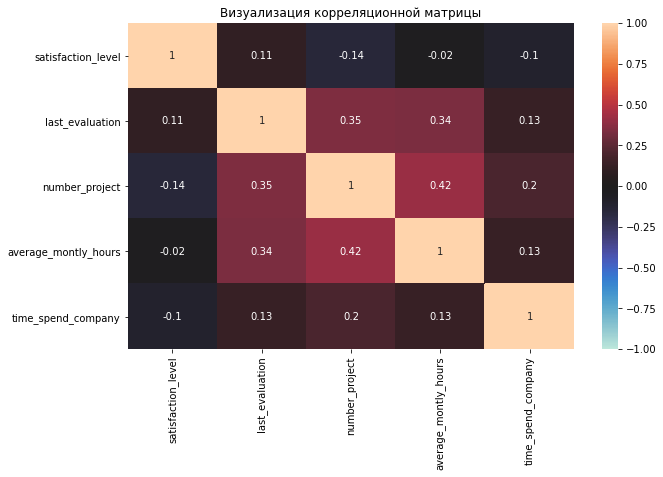

In [7]:
f, ax = plt.subplots(figsize=(10, 6));
ax.set_title('Визуализация корреляционной матрицы');
sns.heatmap(correlation_matrix, vmin=-1, vmax=1, center=0, annot=True);

#### Две самые скоррелированные переменные: 

* Коэффициент корреляции между средним количеством часов, проведенных сотрудником на рабочем месте, (average_montly_hours) и количеством проектов, выполненных за время работы (number_project) равен 0.417.

* Коэффициент корреляции между временем с момента последней оценки в годах (last_evaluation) и количеством проектов, выполненных за время работы (number_project) равен 0.35.

#### Две наименее скоррелированные переменные: 

* Коэффициент корреляции между средним количеством часов на рабочем месте в месяц (average_montly_hours) и уровенем удовлетворенности работой (satisfaction_level) равен -0,02. 

* Коэффициент корреляции между стажем работы в компании в годах (time_spend_company) и уровенем удовлетворенности работой (satisfaction_level) равен -0,1.

Коэффициенты корреляции близкие к нулю, означает что имеется слабая корреляция между переменными, то есть переменные не зависят друг от друга (линейно).

### 4. Рассчитайте сколько сотрудников работает в каждом департаменте.

In [10]:
# Работало всего суммарно
df.groupby(df.department).left.count().reset_index()

,department,left
0,IT,1227
1,RandD,787
2,accounting,767
3,hr,739
4,management,630
5,marketing,858
6,product_mng,902
7,sales,4140
8,support,2229
9,technical,2720


In [11]:
#Работают в компании на данный момент, left = 0
df[df.left == 0].groupby('department').left.count().reset_index()

,department,left
0,IT,954
1,RandD,666
2,accounting,563
3,hr,524
4,management,539
5,marketing,655
6,product_mng,704
7,sales,3126
8,support,1674
9,technical,2023


### 5. Показать распределение сотрудников по зарплатам.

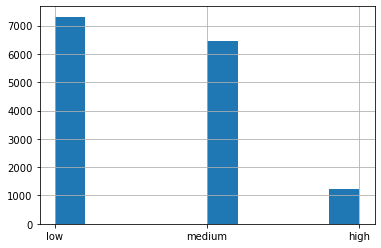

In [12]:
df.salary.hist();

### 6. Показать распределение сотрудников по зарплатам в каждом департаменте по отдельности

In [13]:
salary_department_distribution = df.pivot_table(index = 'department', columns = 'salary', values = 'left', aggfunc = 'count', fill_value = 0)
salary_department_distribution

salary,high,low,medium
department,,,
IT,83,609,535
RandD,51,364,372
accounting,74,358,335
hr,45,335,359
management,225,180,225
marketing,80,402,376
product_mng,68,451,383
sales,269,2099,1772
support,141,1146,942


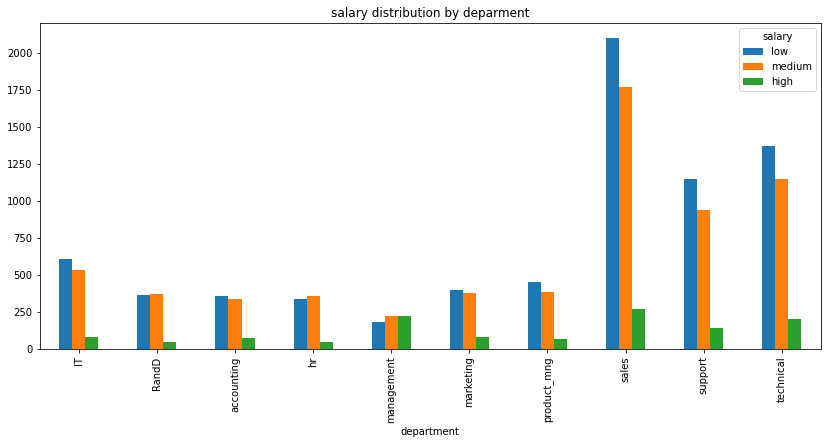

In [14]:
salary_department_distribution[['low','medium','high']].plot(kind='bar', 
                                    title='salary distribution by deparment', 
                                    figsize=(14, 6));

### 7.Проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом

In [15]:
low_salary_workers = df[df.salary == 'low'].average_montly_hours
high_salary_workers = df[df.salary == 'high'].average_montly_hours

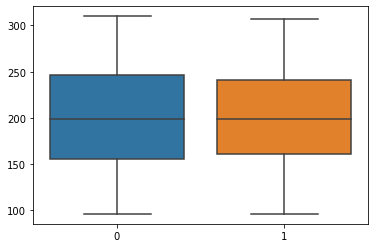

In [16]:
sns.boxplot(data=[low_salary_workers, high_salary_workers]);

<AxesSubplot:>

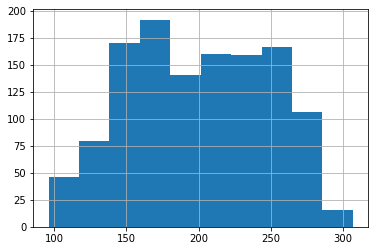

In [17]:
high_salary_workers.hist()

<AxesSubplot:>

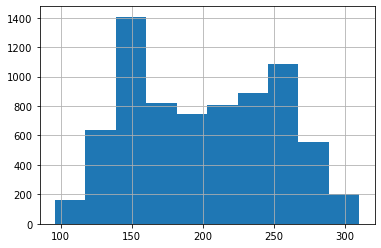

In [18]:
low_salary_workers.hist()

In [19]:
print(low_salary_workers.mean())
print(high_salary_workers.mean())

200.9965828321487
199.86742118027485


Нулевая и альтернативная гипотезы:
* H0: сотрудники с высоким и с низким окладами проводят на работе одинаковое количество времени
* H1: сотрудники с высоким окладом проводят на работе меньше/больше времени, чем сотрудники с низким окладом

Две выборки с близким к нормальному распределению, используем t-тест для независимых выборок

In [20]:
alpha = 0.05
result = stats.ttest_ind(high_salary_workers, low_salary_workers, equal_var=False)
print(result)

if result.pvalue < alpha: 
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергать нулевую гипотезу')

Ttest_indResult(statistic=-0.7624331665385475, pvalue=0.4459045542257889)
Нет оснований отвергать нулевую гипотезу


С статической значимостью 44,5% сотрудники с высоким окладом проводят на работе столько же времени, что и сотрудники с низким окладом.

## 8.Рассчитать следующие показатели среди уволившихся и не уволившихся сотрудников (по отдельности):
* Доля сотрудников с повышением за последние 5 лет
*  Средняя степень удовлетворенности
* Среднее количество проектов

In [21]:
promotion_employee = df.pivot_table(index = 'promotion_last_5years', columns = 'left', values = 'salary', aggfunc = 'count', fill_value = 0, margins=True)
promotion_employee.drop(['All'], axis=1, inplace=True)
promotion_employee

left,0,1
promotion_last_5years,,
0,11128,3552
1,300,19
All,11428,3571


In [22]:
promotion_employee.transform(lambda x: x / x.max())

left,0,1
promotion_last_5years,,
0,0.973749,0.994679
1,0.026251,0.005321
All,1.000000,1.000000


* Если promotion_last_5years=0 означает, что сотрудник не повышался за последние пять лет, то доля сотрудников, которых повысили, крайне мала около 2,6% для не уволившихся сотрудников и 0,5% для уволившихся сотрудников.

In [23]:
# Средняя степень удовлетворенности среди уволившихся и не уволившихся сотрудников
df.groupby('left').satisfaction_level.mean().reset_index()

,left,satisfaction_level
0,0,0.666810
1,1,0.440098


* Средняя степень удовлетворенности уволившихся сотрудников (left=1) равна 0.44, для неуволившихся сотрудников (left=0) равна 0.67

In [24]:
# Среднее количество проектов среди уволившихся и не уволившихся сотрудников
df.groupby('left').number_project.mean().reset_index()

,left,number_project
0,0,3.786664
1,1,3.855503


* Среднее количество проектов уволившихся сотрудников (left=1) равно 3.78 , для неуволившихся сотрудников (left=0) равно 3.85

### 9.Разделить данные на тестовую и обучающую выборки

Построить модель LDA, предсказывающую уволился ли сотрудник на основе имеющихся факторов (кроме department и salary)

Оценить качество модели на тестовой выборки

In [25]:
data = df.iloc[:,[0,1,2,3,4,5,7]]
data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
0,0.38,0.53,2,157,3,0,0
1,0.80,0.86,5,262,6,0,0
2,0.11,0.88,7,272,4,0,0
3,0.72,0.87,5,223,5,0,0
4,0.37,0.52,2,159,3,0,0
...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,0
14995,0.37,0.48,2,160,3,0,0
14996,0.37,0.53,2,143,3,0,0
14997,0.11,0.96,6,280,4,0,0


In [26]:
data_class = df['left'].to_numpy()

In [27]:
# разделяем выборку на тренировочную и тестовую
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, data_class, test_size=0.3, random_state=42)

In [28]:
# импортируем LDA-функционал
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()

In [29]:
# обучаем данные
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [30]:
# смотрим разницу факта и прогноза
result = pd.DataFrame([y_test, lda.predict(X_test)]).T
result

,0,1
0,0,0
1,0,0
2,0,0
3,1,0
4,0,0
...,...,...
4495,0,0
4496,0,1
4497,0,0
4498,0,0


In [31]:
# расчет точности - отношение верных прогнозов к общему количеству позиций
from sklearn.metrics import accuracy_score
accuracy_score(y_test, lda.predict(X_test))

0.7557777777777778

Оценить качество модели на тестовой выборки

Расчет точности, как отношения верных прогнозов к общему числу прогнозов, показал, что в 75% случаев на основе имеющихся факторов модель будет предсказывать уволился сотрудник или нет.